# Задание 1. Выбор распределения и построение выборки

<ol>
    <li>Выбрать распределение;</li>
    <li>Сгенерировать из него выборку объёма 1000;</li>
    <li>Построить гистограмму выборки;</li>
    <li>Построить поверх гистограммы теоретическую плотность выбранного распределения случайной величины.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import chi2
%matplotlib inline

В качестве исследуемого распределения было выбрано распределение <a href='https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82'>хи-квадрат</a>, которое часто встречается в магнитно-резонансной томографии.

<font color = blue></b>Распределение $\chi ^2$ (хи-квадрат) с $k$ степенями свободы</b></font> — это распределение суммы квадратов $k$ независимых стандартных нормальных случайных величин.

X~ $\chi ^2$($k$)

<i>Свойства распределения $\chi ^2$</i>:
<ol>
    <li> Математическое ожидание = числу степеней свободы ($k$)</li>
    <li> Дисперсия = (2$k$)</li>
</ol>

In [2]:
df = 55 # число степеней свободы
rv_range = 1000 # объем выборки для задания 1 и количество выборок для задания 2

In [3]:
chi2_dist = chi2(df) # распределение хи-квадрат

mean = chi2_dist.mean()
print ('Математическое ожидание:', mean)

variance = chi2_dist.var()
print ('Дисперсия:', variance)

Математическое ожидание: 55.0
Дисперсия: 110.0


In [4]:
sample = chi2.rvs(df, size = rv_range) # формирование необходимой выборки

Text(0.5, 0, '$x$')

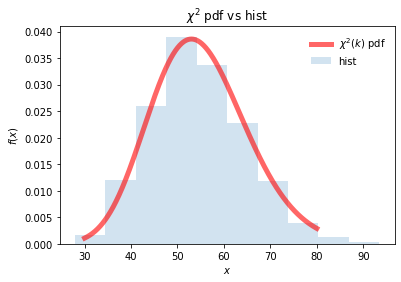

In [5]:
plt.hist(sample, density=True, histtype='stepfilled', alpha=0.2, label='hist') # гистограмма выборки

#  построение теоретической плотности распределения хи - квадрат
x = np.linspace(30, 80, rv_range) # определение диапазона для Х

plt.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='$\chi ^2$($k$) pdf')

plt.legend(loc='best', frameon=False)
plt.title("$\chi^2$ pdf vs hist ")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Задание 2. Оценка распределения выборочного среднего

1) Оценить распределение выборочного среднего случайной величины при разных объёмах выборок:
<ul>
    <li>10</li>
    <li>50</li>
    <li>100</li>
</ul>
2) Сгенерировать 1000 выборок объема n и построить гистограммы распределений их выборочных средних

3) Используя информацию о теоретических среднем и дисперсии исходного распределения, посчитать значения параметров нормальных распределений, которыми, согласно ЦПТ, приближается распределение выборочных средних. 

4) Поверх каждой гистограммы построить плотность соответсвующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

In [6]:
n1 = 10
n2 = 50
n3 = 100

In [7]:
# 95 % доверительный интервал 
def bounds_95 (df, n):
    low_bound = df - 2 * np.sqrt(df / n) 
    high_bound = df + 2 * np.sqrt(df / n)
    
    print('(', low_bound, ';', high_bound,')')

## Размер выборки равен 10

Text(0.5, 0, '$x$')

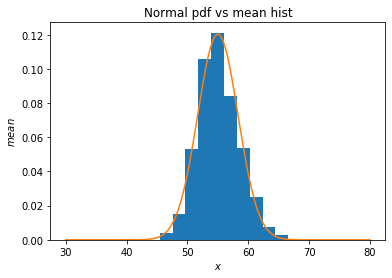

In [8]:
# 1000 выборок объема n1
sample_list_n1 = [chi2.rvs(df, size = n1) for j in range(rv_range)]

# гистограмма распределений выборочных средних
plt.hist([sample.mean() for sample in sample_list_n1], density = True)

# плотность нормального распределения
norm_n1 = sts.norm(mean, np.sqrt(variance/n1))

plt.plot(x, norm_n1.pdf(x))

plt.title("Normal pdf vs mean hist")
plt.ylabel('$mean$')
plt.xlabel('$x$')

In [9]:
bounds_95(df, n1)

( 50.30958424017657 ; 59.69041575982343 )


## Размер выборки равен 50

Text(0.5, 0, '$x$')

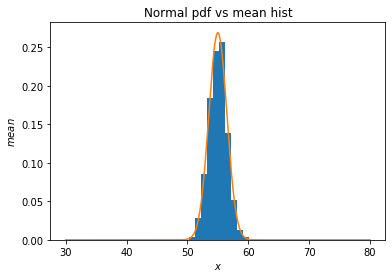

In [10]:
# 1000 выборок объема n2
sample_list_n2 = [chi2.rvs(df, size = n2) for j in range(rv_range)]

# гистограмма распределений выборочных средних
plt.hist([sample.mean() for sample in sample_list_n2], density = True)

# плотность нормального распределения
norm_n2 = sts.norm(mean, np.sqrt(variance/n2))

plt.plot(x, norm_n2.pdf(x))

plt.title("Normal pdf vs mean hist")
plt.ylabel('$mean$')
plt.xlabel('$x$')

In [11]:
bounds_95(df, n2)

( 52.9023823036597 ; 57.0976176963403 )


## Размер выборки равен 100

Text(0.5, 0, '$x$')

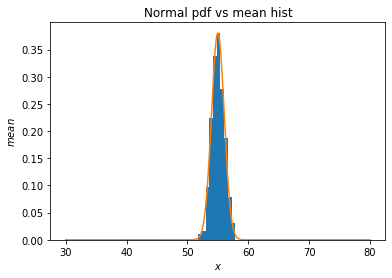

In [12]:
# 1000 выборок объема n3
sample_list_n3 = [chi2.rvs(df, size = n3) for j in range(rv_range)]

# гистограмма распределений выборочных средних
plt.hist([sample.mean() for sample in sample_list_n3], density = True)

# плотность нормального распределения
norm_n3 = sts.norm(mean, np.sqrt(variance/n3))

plt.plot(x, norm_n3.pdf(x))

plt.title("Normal pdf vs mean hist")
plt.ylabel('$mean$')
plt.xlabel('$x$')

In [13]:
bounds_95(df, n3)

( 53.51676030258087 ; 56.48323969741913 )


# Выводы

Как видно из рассчитанных 95% доверительных интервалов и сформированных графиков, точность аппроксимации распределения выборочных средних нормальным распределением повышается с ростом n, что и утверждает центральная предельная теорема.